# <a id='toc1_'></a>[Snowfall Removal Budget Calculation](#toc0_)


Note: This project uses [IBM Environmental Intelligence APIs](https://www.ibm.com/products/environmental-intelligence/?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-Snowfall+Removal+Budget+Calculation-v1), specifically the [History on Demand Direct API](https://developer.ibm.com/apis/catalog/envintelsuite--ibm-environmental-intelligence/Introduction#history-on-demand-apis), to walk step by step through the [Snowfall Removal Budget Calculation](https://github.com/IBM/Environmental-Intelligence/blob/main/historical_weather_on_demand/samples/industry_use_cases/snowfall_removal_budget.ipynb) use case.


**Table of contents**<a id='toc0_'></a>    
- [Snowfall Removal Budget Calculation](#toc1_)    
  - [Introduction](#toc1_1_)    
    - [What is History on Demand Direct API?](#toc1_1_1_)    
  - [What does this project do?](#toc1_2_)    
  - [Objectives](#toc1_3_)    
  - [Setup](#toc1_4_)    
    - [Installing required libraries](#toc1_4_1_)    
  - [History on Demand Direct API](#toc1_5_)    
  - [Make API Call](#toc1_6_)    
    - [Analysis](#toc1_6_1_)    
      - [What is temparature?](#toc1_6_1_1_)    
      - [What is temperatureDewPoint?](#toc1_6_1_2_)    
      - [What is precip1Hour?](#toc1_6_1_3_)    
      - [What is snow1Hour?](#toc1_6_1_4_)    
  - [Interested to learn more?](#toc1_7_)    


## <a id='toc1_1_'></a>[Introduction](#toc0_)

### <a id='toc1_1_1_'></a>[What is the History on Demand Direct API?](#toc0_)

[HoD Direct](https://developer.ibm.com/apis/catalog/envintelsuite--ibm-environmental-intelligence/Introduction#history-on-demand-apis) is a synchronous API that enables users to examine hourly gCOD and AGE data. Users specify the geospatial and the temporal facets of the query in the URL, and the data is returned in the response.

## <a id='toc1_2_'></a>[What does this guided project do?](#toc0_)

This project uses the **History on Demand Direct API** to calculate the costs incurred to clear snowfall. Specifically, we will analyze snowfall data to understand accumulations by comparing the average snowfall during the same period over the past years. With this analysis, we can calculate the maintenance costs of clearing snow for a local government organization.


## <a id='toc1_3_'></a>[Objectives](#toc0_)

After completing this lab you will:

- Understand how to set up and configure **IBM Environmental Intelligence - History on Demand Direct API**.
- Know how to use the **History on Demand Direct API**.


## <a id='toc1_4_'></a>[Setup](#toc0_)

For this lab, we will be using the following libraries:


*   [`pandas`](https://pandas.pydata.org/): pandas is a fast, powerful, flexible and easy to use open source data analysis and data manipulation library built on top of the Python programming language.
*   [`requests`](https://pypi.org/project/requests/): Requests is an elegant and simple HTTP library for Python.
*   [`json`](https://docs.python.org/3/library/json.html): JSON (JavaScript Object Notation) is a lightweight data-interchange format.
*   [`matplotlib`](https://matplotlib.org/) for additional plotting tools.


In [1]:
%pip install pandas==2.1.4 --no-warn-script-location | tail -n 1
%pip install matplotlib==3.9.2 --no-warn-script-location | tail -n 1

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
#All imports needed for the sample
import requests
import pandas as pd
import json
from pandas import json_normalize

import warnings
warnings.filterwarnings('ignore')

## <a id='toc1_5_'></a>[Accessing History on Demand Direct API](#toc0_)

This section provides the steps for you to obtain the necessary credentials to access the Environmental Intelligence APIs. Once you have signed up, you will receive the `api_key`, `tenant_id`, and `org_id` that you need to access the APIs.

**Note**: The following steps are intended for new registrants only. If you previously created an IBMid, go to the Free APIs Preview [sign-up form](https://www.ibm.com/account/reg/us-en/signup?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-Snowfall+Removal+Budget+Calculation-v1&formid=urx-52894), click **Log in**, and go to step 3 below, starting at “A page opens ….”

1. Go to the Free APIs Preview [sign-up form](https://www.ibm.com/account/reg/us-en/signup?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-Snowfall+Removal+Budget+Calculation-v1&formid=urx-52894).
2. Complete the form and click **Next**. A message displays stating that a verification code has been sent to the email address you entered. (If you don't see the email with the code, be sure to check your Spam or Promotions folder.)
3. Enter the validation code from the email and click **Submit**. A page opens indicating that your request has been received and that you will receive an email when your access is ready. That email will include a link to the Developer Console, Samples, and Learning Courses. (If you don't see the email, check your Spam or Promotions folder.)
4. After you login to the Developer Console using your IBMid, you will have access to your **API key**, **OrgId**, **TenantId (ClientId)**, and token.
5. Use the **API key**, **OrgId**, and **TenantId** to access and use the APIs.


**Note**: If you see a 401 Unauthorized error:
- Check the Authorization.
- Re-enter the security parameters in the correct order if missing.



In [2]:
# Copy your keys here
EI_API_KEY    = '/'
EI_TENANT_ID  = '/'
EI_ORG_ID     = '/'


EI_AUTH_ENDPOINT = "https://api.ibm.com/saascore/run/authentication-retrieve"
EI_API_BASE_URL  = "https://api.ibm.com/geospatial/run/v3/wx"
EI_API_ENDPOINT  = f"{EI_API_BASE_URL}/hod/r1/direct"


EI_AUTH_CLIENT_ID  = 'saascore-' + EI_TENANT_ID
EI_CLIENT_ID = 'geospatial-' + EI_TENANT_ID

auth_request_headers: dict = {}
auth_request_headers["X-IBM-Client-Id"] = EI_AUTH_CLIENT_ID
auth_request_headers["X-API-Key"] = EI_API_KEY

verify = True

auth_url = f"{EI_AUTH_ENDPOINT}/api-key?orgId={EI_ORG_ID}"
              
response = requests.get(url = auth_url,
                        headers = auth_request_headers,
                        verify  = verify
                       )
if response.status_code == 200:
    jwt_token = response.text
    print("Authentication Success")
else:     
    print("Authentication Failed")
    print(response.text)

Authentication Success


## <a id='toc1_6_'></a>[Make an API call](#toc0_)

Once the API credentials are setup, we will build the required query parameters and headers for making an HOD Direct API call. 
With the query parameters and the headers set up, we will send an **HTTP GET Request** to the **HOD Direct API Endpoint** and get back the response.
This API response is a **JSON** structure, which we'll convert to Dataframe and display.

There are various parameters you can send to retrieve the snowfall information for a particular location:
1. By using either the geographical coordinates or a postalKey of the desired location.
2. StartDateTime and endDateTime for the location.
3. The required format for the output to be retrieved, in this case JSON, and many other required parameters.


In [3]:
# Create the query parameter
# provide the geocode cordinates, startdatetime, enddatatime, format as json, units as per your requirements to get data
query_params: dict = {}
query_params["startDateTime"] = "2023-03-07T00"
query_params["endDateTime"] = "2023-04-07T23"
query_params["format"] = "json"
query_params["units"] = "e"
query_params["compact"] = "false"
query_params["postalKey"] = "80301:US"

# Create the query headers
query_request_headers: dict = {}
query_request_headers["x-ibm-client-id"] = EI_CLIENT_ID
query_request_headers["Authorization"] = "Bearer " + jwt_token

# Create the Request object as GET Request with host URL, query parameters and query headers
request = requests.Request('GET', EI_API_ENDPOINT, params=query_params, headers=query_request_headers)
 
# Create a Session object and send the request
session = requests.Session()
response = session.send(request.prepare())

if response.text != "":
    # Get the response as json
    response_json = response.json()
    
    # Get json and convert to dataframe
    json_str = json.dumps(response_json)
    dict = json.loads(json_str)
    dataframe = json_normalize(dict) 
    
    # display
    pd.set_option('display.max_colwidth', None)
    display(dataframe) 
else:
    print("Empty Response")

,requestedLatitude,requestedLongitude,latitude,longitude,gridpointId,validTimeUtc,drivingDifficultyIndex,iconCode,iconCodeExtended,precip1Hour,...,temperatureChange24Hour,temperatureMax24Hour,temperatureMin24Hour,temperatureDewPoint,temperatureFeelsLike,uvIndex,visibility,windDirection,windGust,windSpeed
0,40.04628,-105.199184,40.065934,-105.205091,9xj5vvzbzxqqn,2023-04-01T00:20:00+0000,0,32,3200,0.0,...,-5.8,56.6,36.4,8.7,39.5,0,10.00,290.0,32.0,16.1
1,40.04628,-105.199184,40.065934,-105.205091,9xj5vvzbzxqqn,2023-04-01T01:20:00+0000,0,32,3200,0.0,...,-0.1,49.9,36.4,6.5,42.0,0,10.00,300.0,22.1,10.5
2,40.04628,-105.199184,40.065934,-105.205091,9xj5vvzbzxqqn,2023-04-01T02:20:00+0000,0,31,3100,0.0,...,-1.2,49.9,36.4,7.3,41.6,0,10.00,320.0,NaN,6.0
3,40.04628,-105.199184,40.065934,-105.205091,9xj5vvzbzxqqn,2023-04-01T03:20:00+0000,0,33,3300,0.0,...,-2.3,49.9,36.4,9.8,39.5,0,10.00,30.0,NaN,5.6
4,40.04628,-105.199184,40.065934,-105.205091,9xj5vvzbzxqqn,2023-04-01T04:20:00+0000,0,29,2900,0.0,...,-1.4,49.9,36.4,11.9,39.8,0,10.00,220.0,NaN,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,40.04628,-105.199184,40.065934,-105.205091,9xj5vvzbzxqqn,2023-04-07T18:20:00+0000,0,32,3200,0.0,...,6.5,58.4,27.8,13.9,58.4,6,10.00,100.0,NaN,2.2
163,40.04628,-105.199184,40.065934,-105.205091,9xj5vvzbzxqqn,2023-04-07T19:20:00+0000,0,32,3200,0.0,...,6.9,61.3,27.8,14.5,61.3,6,10.00,90.0,NaN,3.6
164,40.04628,-105.199184,40.065934,-105.205091,9xj5vvzbzxqqn,2023-04-07T20:20:00+0000,0,32,3200,0.0,...,7.7,64.0,27.8,12.1,64.0,6,10.00,110.0,NaN,2.9
165,40.04628,-105.199184,40.065934,-105.205091,9xj5vvzbzxqqn,2023-04-07T21:20:00+0000,0,32,3200,0.0,...,8.1,65.9,27.8,12.1,65.8,4,10.00,200.0,NaN,6.3


### <a id='toc1_6_1_'></a>[Analysis](#toc0_)

As we can see above, we've retrieved a lot of data pertaining to the specified location. The dataframe above consists of a total of **40 columns** and **167 rows** with all the information needed for the analysis.

Now that we have retrieved the data, we can plot it on a **graph** to visualize how the **temparature** and **temperatureDewPoint** relates to each other across different time periods. We'll use the code below.

#### <a id='toc1_6_1_1_'></a>[What is temparature?](#toc0_)

Temperature is a measure of the thermal energy or heat in an object or environment, indicating how hot or cold it is.

Units - Expressed in fahrenheit when units=e, expressed in celsius when units=m, s, or h.

Range - (-140) to 140

#### <a id='toc1_6_1_2_'></a>[What is temperatureDewPoint?](#toc0_)

The temperature at which air must be cooled at constant pressure to reach saturation. The Dew Point is also an indirect measure of the humidity of the air. The Dew Point will never exceed the Temperature. When the Dewpoint and Temperature are equal, clouds or fog will typically form. The closer the values of Temperature and Dew Point, the higher the relative humidity.

Units - Expressed in Fahrenheit when units=e, expressed in Celsius when units=m, s, or h.

Range - (-80) to 100 (°F) or (-62) to 37 (°C)

More information on the parameters can be found in the Environmental Intelligence [documentation](https://www.ibm.com/docs/en/environmental-intel-suite?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-Snowfall+Removal+Budget+Calculation-v1_1730322876&topic=apis-currents-demand).


<Axes: xlabel='validTimeUtc'>

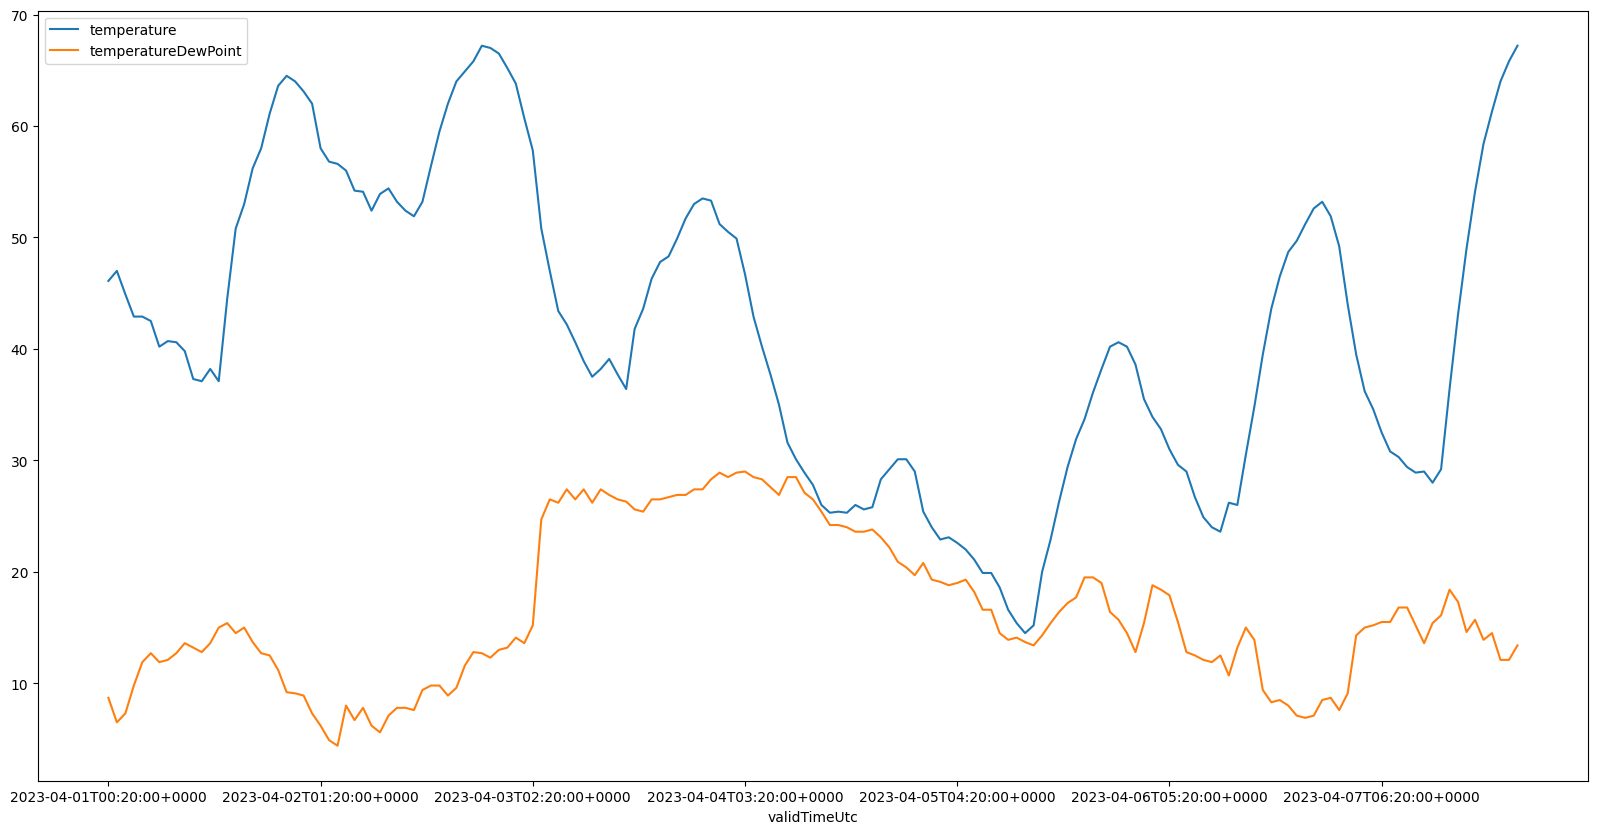

In [4]:
dataframe.plot(x='validTimeUtc',y=['temperature','temperatureDewPoint'],figsize=(20,10))

We can now sum up the **precip1Hour** and **snow1Hour** columns' data to get the whole value for precipitation and snow, respectively.

#### <a id='toc1_6_1_3_'></a>[What is precip1Hour?](#toc0_)

This value represents rolling hour liquid precipitation amount. The amounts presented are a rolling time through the request time (now).

Units - Expressed in inches when units=e, expressed in millimeters when units=m, s, or h.

#### <a id='toc1_6_1_4_'></a>[What is snow1Hour?](#toc0_)

This value represents one-hour snowfall amount. The amounts presented are a rolling time through the request time (now).

Units - Expressed in inches when units=e, expressed in centimeters when units=m, s, or h.

More information on the parameters can be found in the Environmental Intelligence [documentation](https://www.ibm.com/docs/en/environmental-intel-suite?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-Snowfall+Removal+Budget+Calculation-v1_1730322876&topic=apis-currents-demand).


In [5]:
#sum up precip and snow for March
marPrecip2023 = dataframe['precip1Hour'].sum()
MarSnow2023 = dataframe['snow1Hour'].sum()
print(f"marPrecip2023: {marPrecip2023}\nMarSnow2023: {MarSnow2023}")

marPrecip2023: 0.21000000000000002
MarSnow2023: 2.9


We can now compare the variance between March 2023 and historic averages using the values in the dictionary below.


In [6]:
# Data in dictionary form
data = {
    'almanacInterval': [0],
    'almanacRecordDate': ['M'],
    'almanacRecordPeriod': [101],
    'almanacRecordYearMax': [2005],
    'almanacRecordYearMin': [1930],
    'precipitationAverage': [0.76],
    'snowAccumulationAverage': [16.03],
    'stationId': [50848],
    'stationName': ['BOULDER'],
    'temperatureAverageMax': [47],
    'temperatureAverageMin': [22],
    'temperatureMean': [35],
    'temperatureRecordMax': [73],
    'temperatureRecordMin': [-33]
}

# Convert dictionary to DataFrame
snowfall_normal_df = pd.DataFrame(data)

Let's display the **snowAccumulationAverage** from the above data.


In [7]:
Mar_normal_snow =  snowfall_normal_df['snowAccumulationAverage'].item()
print(f"Mar_normal_snow: {Mar_normal_snow}")

Mar_normal_snow: 16.03


Perform the calculations below to get the **costs** incurred to remove the accumulated snow.


In [8]:
# We know that Boulder's average snowfall is 88.3" and that the annual snow removal budget is $2M

PercentAnnualSnowInMar = round((MarSnow2023 / 88.3),2)
Mar_percentnormal = round((MarSnow2023 / Mar_normal_snow),2)
print(f"PercentAnnualSnowInMar: {PercentAnnualSnowInMar}\nMar_percentnormal: {Mar_percentnormal}")

PercentAnnualSnowInMar: 0.03
Mar_percentnormal: 0.18


Get the normal cost of snow removal in March using the data we have.


In [9]:
# Normal Cost of snow removal in the month of March
normal_Mar_cost = 2000000 * (Mar_normal_snow / 88.3)
print(f"round(normal_Mar_cost,2): {round(normal_Mar_cost,2)}")

round(normal_Mar_cost,2): 363080.41


Now that we have the normal cost for snow removal in March, let's calculate the cost of March 2023 using the following code snippet.


In [10]:
#cost of snow removal in the month of March 2023
Mar2023_cost = normal_Mar_cost * Mar_percentnormal
print(f"round(Mar2023_cost,2): {round(Mar2023_cost,2)}")

round(Mar2023_cost,2): 65354.47


Let's calculate the **difference** in **snow removal costs** in **March 2023** vs a **normal March in the City of Boulder**.


In [11]:
#2023 budget 
delta = normal_Mar_cost - Mar2023_cost
print (f"2023 low snow totals reduced the City of Boulder's spend by ${round(delta,2)}")

2023 low snow totals reduced the City of Boulder's spend by $297725.93


## <a id='toc1_7_'></a>[Interested to learn more?](#toc0_)

Use the following resources to learn more about Environmental Intelligence:

- <a href="https://developer.ibm.com/learningpaths/environmental-intelligence?utm_source=sn&utm_medium=gp&utm_campaign=ei_apis&utm_content=snowfall_removal_next_steps" target="_blank">Environmental Intelligence learning path</a>
- <a href="https://developer.ibm.com/blogs/ibm-environmental-intelligence?utm_source=sn&utm_medium=gp&utm_campaign=ei_apis&utm_content=snow_removal_next_steps" target="_blank">Environmental Intelligence: A developers toolkit for sustainable innovation</a> 
- <a href="https://www.ibm.com/products/environmental-intelligence/?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-Snowfall+Removal+Budget+Calculation-v1">IBM Environmental Intelligence APIs</a> 
